<a href="https://colab.research.google.com/github/Kereophillus/AI-Coursework-2026/blob/main/Week-05-Predictive-Maintenance/Predictive_Maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## _Goal: Use Machine Learning to predict equipment failure._

## Load sensor data from Kaggle

In [1]:
import kagglehub
import pandas as pd
import os

# 1. Download the dataset
path = kagglehub.dataset_download("dnkumars/industrial-equipment-monitoring-dataset")

# 2. Find the CSV file in that path
# kagglehub downloads into a folder; we need the actual .csv file inside it
files = os.listdir(path)
csv_file = [f for f in files if f.endswith('.csv')][0]
full_path = os.path.join(path, csv_file)

# 3. Load into Pandas
df = pd.read_csv(full_path)

print("Dataset Loaded Successfully!")
print(df.info()) # Shows us the columns and if there are missing values

100%|██████████| 291k/291k [00:00<00:00, 57.7MB/s]

Extracting files...
Dataset Loaded Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7672 entries, 0 to 7671
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  7672 non-null   float64
 1   pressure     7672 non-null   float64
 2   vibration    7672 non-null   float64
 3   humidity     7672 non-null   float64
 4   equipment    7672 non-null   object 
 5   location     7672 non-null   object 
 6   faulty       7672 non-null   float64
dtypes: float64(5), object(2)
memory usage: 419.7+ KB
None


## Pre-processing Step

In [2]:
# Check how many machines actually failed
print(df['faulty'].value_counts())

# Define our Features (X) based on your description
# Columns: temperature, pressure, vibration, humidity
X = df[['temperature', 'pressure', 'vibration', 'humidity']]
y = df['faulty']

faulty
0.0    6905
1.0     767
Name: count, dtype: int64


## Training a Random Forest Classifier


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the "Forest"
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1377
         1.0       0.92      0.89      0.90       158

    accuracy                           0.98      1535
   macro avg       0.95      0.94      0.94      1535
weighted avg       0.98      0.98      0.98      1535



## Visualization: The Confusion Matrix

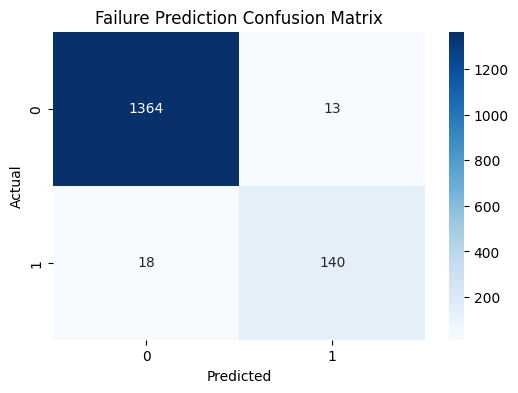

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Failure Prediction Confusion Matrix')
plt.show()